In [90]:
import pandas as pd

https://scikit-learn.org/stable/modules/preprocessing.html

In [91]:
wine = pd.read_csv('../csv/wine.csv')

In [139]:
wine

,Class,Alcohol,Malic
0,1,13.20,1.78
1,1,13.16,2.36
2,1,14.37,1.95
3,1,13.24,2.59
4,1,14.20,1.76
...,...,...,...
172,3,13.71,5.65
173,3,13.40,3.91
174,3,13.27,4.28
175,3,13.17,2.59


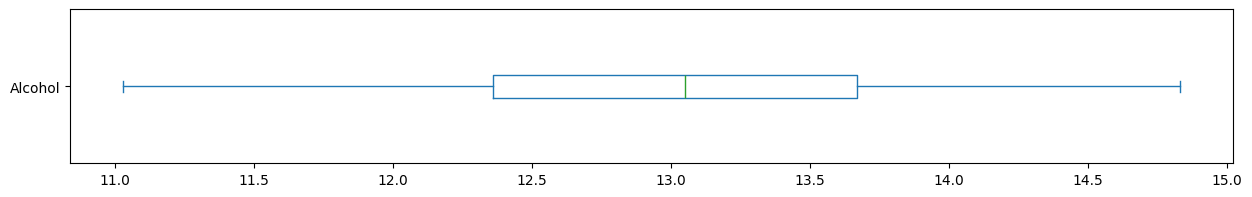

In [92]:
wine['Alcohol'].plot.box(vert=False, figsize=(15,2));

In [93]:
wine['Alcohol'].describe()

count    177.000000
mean      12.993672
std        0.808808
min       11.030000
25%       12.360000
50%       13.050000
75%       13.670000
max       14.830000
Name: Alcohol, dtype: float64

In [94]:
wine['Malic'].describe()

count    177.000000
mean       2.339887
std        1.119314
min        0.740000
25%        1.600000
50%        1.870000
75%        3.100000
max        5.800000
Name: Malic, dtype: float64

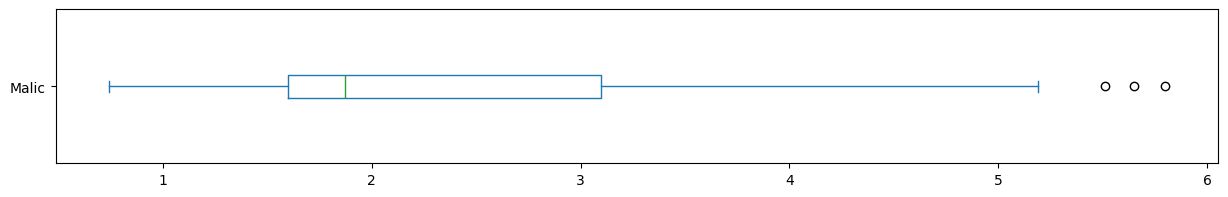

In [95]:
wine['Malic'].plot.box(vert=False, figsize=(15,2));

In [96]:
# pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler

In [97]:
minmax_scale = MinMaxScaler().fit(wine[['Alcohol', 'Malic']])
df_minmax = minmax_scale.transform(wine[['Alcohol', 'Malic']])

In [98]:
print('Valor mínimo depois de normalizar:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))

print('\nValor máximo depois de normalizar:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))

Valor mínimo depois de normalizar:
Alcohol=0.00, Malic acid=0.00

Valor máximo depois de normalizar:
Alcohol=1.00, Malic acid=1.00


In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
# define os valores de padronização
std_scale = StandardScaler().fit(wine[['Alcohol', 'Malic']])


In [101]:
#transforma os dados utilizando como referencia os dados originais
df_std = std_scale.transform(wine[['Alcohol', 'Malic']])
#df_scale

In [102]:
#media

print('{:.2f}'.format(df_std[:,0].mean()))

-0.00


In [103]:
#desvio padrão

print('{:.2f}'.format(df_std[:,0].std()))


1.00


In [104]:
wine_data_normalized = wine.copy()
wine_data_normalized['Alcohol'] = df_minmax[:,0]
wine_data_normalized['Malic'] = df_minmax[:,1]

In [105]:
wine_data_standardized = wine.copy()
wine_data_standardized['Alcohol'] = df_std[:,0]
wine_data_standardized['Malic'] = df_std[:,1]

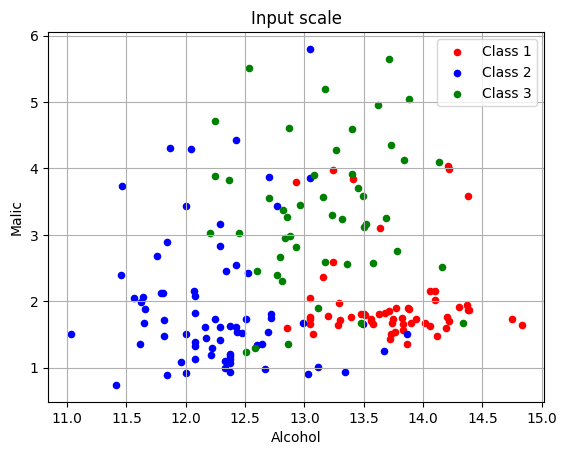

In [106]:
ax = wine[wine['Class']==1].plot.scatter(x="Alcohol", y="Malic", color="Red", label="Class 1")
ax = wine[wine['Class']==2].plot.scatter(x="Alcohol", y="Malic", color="Blue", label="Class 2", ax=ax)
wine[wine['Class']==3].plot.scatter(x="Alcohol", y="Malic", color="Green", label="Class 3", ax=ax, grid=True, title = "Input scale");

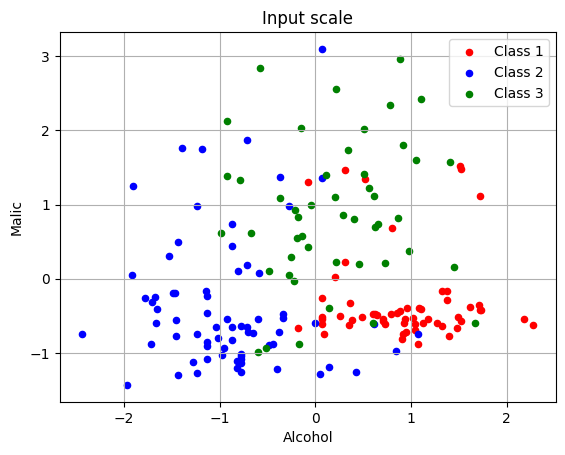

In [107]:
ax = wine_data_standardized[wine_data_standardized['Class']==1].plot.scatter(x="Alcohol", y="Malic", color="Red", label="Class 1")
ax = wine_data_standardized[wine_data_standardized['Class']==2].plot.scatter(x="Alcohol", y="Malic", color="Blue", label="Class 2", ax=ax)
wine_data_standardized[wine_data_standardized['Class']==3].plot.scatter(x="Alcohol", y="Malic", color="Green", label="Class 3", ax=ax, grid=True, title = "Input scale");

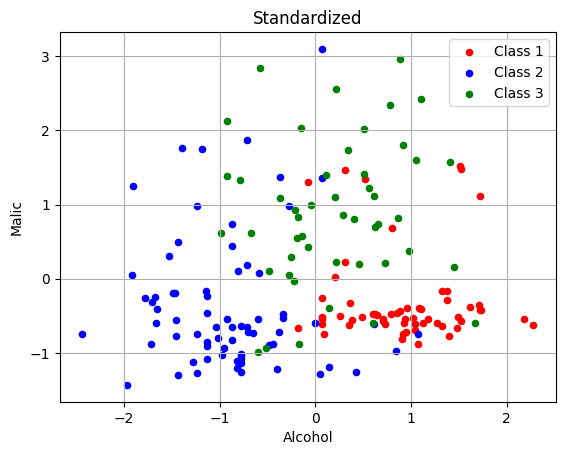

In [108]:
ax = wine_data_standardized[wine_data_standardized['Class']==1].plot.scatter(x="Alcohol", y="Malic", color="Red", label="Class 1")
ax = wine_data_standardized[wine_data_standardized['Class']==2].plot.scatter(x="Alcohol", y="Malic", color="Blue", label="Class 2", ax=ax)
wine_data_standardized[wine_data_standardized['Class']==3].plot.scatter(x="Alcohol", y="Malic", color="Green", label="Class 3", ax=ax, grid=True, title = "Standardized");

In [109]:
from datetime import datetime

In [110]:
now = datetime.now()
now

datetime.datetime(2024, 1, 29, 14, 16, 23, 30682)

In [111]:
now.year, now.month, now.day

(2024, 1, 29)

In [112]:
delta = now - datetime(2011,7,15)
delta

datetime.timedelta(days=4581, seconds=51383, microseconds=30682)

In [113]:
delta.days

4581

In [114]:
delta.seconds

51383

In [115]:
from datetime import timedelta

In [116]:
start = datetime(2011,7,15)

In [117]:
start + timedelta(12)

datetime.datetime(2011, 7, 27, 0, 0)

### Conversao entre string e datetime

In [118]:
stamp = datetime(2011,1,3)
stamp

datetime.datetime(2011, 1, 3, 0, 0)

In [119]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [120]:
value = '2021-07-10'

In [121]:
datetime.strptime(value,'%Y-%m-%d')

datetime.datetime(2021, 7, 10, 0, 0)

In [122]:
date_lst = ['7/7/2021', '15/7/2021']

In [131]:
date_lst = [datetime.strptime(x, '%d/%m/%Y') for x in date_lst]

Podemos usar tambem o metodo parser.parse do pacote de terceitos dateutil

In [124]:
from dateutil.parser import parse

In [125]:
parse('2021-01-03')

datetime.datetime(2021, 1, 3, 0, 0)

In [126]:
parse('Jan 31, 2019 10:45 PM')

datetime.datetime(2019, 1, 31, 22, 45)

In [127]:
parse('6/12/2020', dayfirst=True)

datetime.datetime(2020, 12, 6, 0, 0)

In [132]:
idx = pd.to_datetime(date_lst+[None])
idx

DatetimeIndex(['2021-07-07', '2021-07-15', 'NaT'], dtype='datetime64[ns]', freq=None)

In [133]:
pd.isnull(idx)

array([False, False,  True])

In [134]:
idx[2]

NaT

### Atividade: Casas da Califórnia

Utilizar um dataset usado em python para aprendizado de máquina. Carreguem o dataset
com os comandos.

### ➔ COMO FAZER?
Utilizando o dataset sobre dados de imóveis da Califórnia, realizar:
1. Normalizar a coluna LotArea;
2. Padronizar a coluna LotArea;
3. Gerar três gráficos de pontos para os dados:
◆ Originais;
◆ Normalizados;
◆ Padronizados.

In [136]:
# biblioteca

from sklearn.datasets import fetch_california_housing
from sklearn.datasets import fetch_openml

# dados de imoveis
housing = fetch_california_housing()
data = fetch_openml(name='house_prices', as_frame=True)

dataset = pd.DataFrame(data['data'], columns=data['feature_names'])
dataset['target'] = data['target']

dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,target
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [167]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,target
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [152]:
minmax_scale = MinMaxScaler().fit(dataset[['LotArea']])
df_minmax = minmax_scale.transform(dataset[['LotArea']])

In [153]:
dataset_NORM = dataset.copy()
dataset_NORM['LotArea'] = df_minmax[:,0]

In [154]:
std_scale = StandardScaler().fit(dataset[['LotArea']])
df_std = std_scale.transform(dataset[['LotArea']])

In [155]:
dataset_STANDARD = dataset.copy()
dataset_STANDARD['LotArea'] = df_std[:,0]

In [169]:
dataset_NORM.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,target
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,0.043080,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,0.046653,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,0.029229,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,0.038227,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,0.048150,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,1.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [168]:
dataset_STANDARD.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,target
count,1460.000000,1460.000000,1201.000000,1.460000e+03,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,-5.840077e-17,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,1.000343e+00,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,-9.237292e-01,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,-2.969908e-01,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,-1.040633e-01,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,1.087080e-01,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,2.051827e+01,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<Axes: xlabel='Id', ylabel='LotArea'>

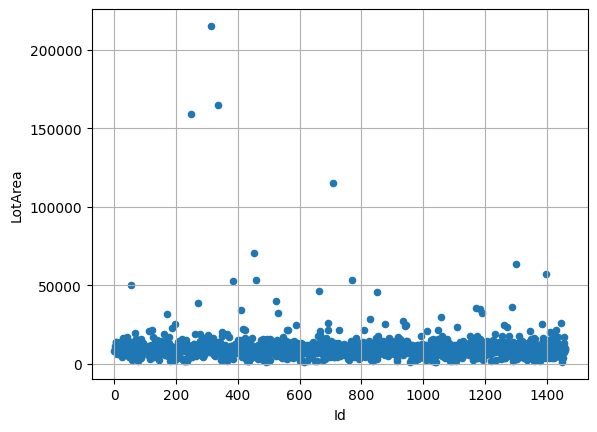

In [170]:
dataset.plot.scatter(x = 'Id', y ='LotArea', grid = True)

<Axes: xlabel='Id', ylabel='LotArea'>

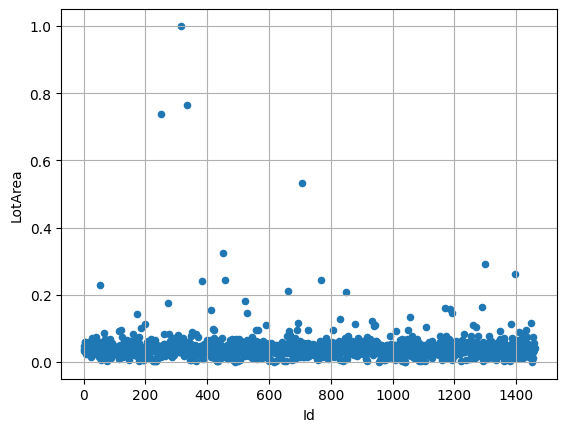

In [172]:
dataset_NORM.plot.scatter(x = 'Id', y ='LotArea', grid = True)

<Axes: xlabel='Id', ylabel='LotArea'>

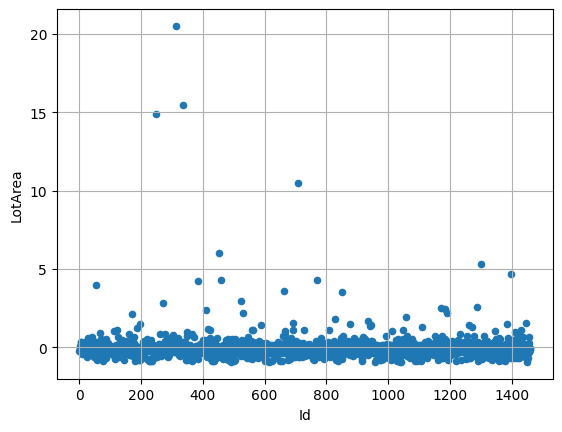

In [171]:
dataset_STANDARD.plot.scatter(x = 'Id', y ='LotArea', grid = True)